In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
import glob
files = glob.glob('/kaggle/working/*')
for f in files:
    os.remove(f)
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/purdue-face-recognition-challenge-2023/sample_submission.csv
/kaggle/input/purdue-face-recognition-challenge-2023/train_small.csv
/kaggle/input/purdue-face-recognition-challenge-2023/train.csv
/kaggle/input/purdue-face-recognition-challenge-2023/category.csv
/kaggle/input/train-small/train_small/6234.jpg
/kaggle/input/train-small/train_small/1269.jpg
/kaggle/input/train-small/train_small/3863.jpg
/kaggle/input/train-small/train_small/6241.jpg
/kaggle/input/train-small/train_small/623.jpg
/kaggle/input/train-small/train_small/2193.jpg
/kaggle/input/train-small/train_small/3750.jpg
/kaggle/input/train-small/train_small/2008.jpg
/kaggle/input/train-small/train_small/5982.jpg
/kaggle/input/train-small/train_small/2081.jpg
/kaggle/input/train-small/train_small/6588.jpg
/kaggle/input/train-small/train_small/3919.jpg
/kaggle/input/train-small/train_small/6197.jpg
/kaggle/input/train-small/train_small/6399.jpg
/kaggle/input/train-small/train_small/3757.jpg
/kaggle/input/train-sma

"\nimport glob\nfiles = glob.glob('/kaggle/working/*')\nfor f in files:\n    os.remove(f)\n"

In [24]:
import csv
import numpy as np

fields = []
with open("/kaggle/input/purdue-face-recognition-challenge-2023/category.csv", "r") as csv_file:
  reader = csv.reader(csv_file, delimiter=',')
  fields = next(reader)
  for row in reader:
        fields.append(row[1])
  fields = np.array(fields)
csv_file.close()
fields = fields[2:]

In [25]:
import os

parent_dir = "/kaggle/working"
for var in fields:
  path = os.path.join(parent_dir, var)
  try: 
      os.mkdir(path) 
  except OSError as error: 
      print(error) 

[Errno 17] File exists: '/kaggle/working/Art Carney'
[Errno 17] File exists: '/kaggle/working/Akemi Darenogare'
[Errno 17] File exists: '/kaggle/working/Billy Bob Thornton'
[Errno 17] File exists: '/kaggle/working/Bill Daley'
[Errno 17] File exists: '/kaggle/working/Amanda Bynes'
[Errno 17] File exists: '/kaggle/working/Anna Friel'
[Errno 17] File exists: '/kaggle/working/Alexander Skarsgard'
[Errno 17] File exists: '/kaggle/working/Anna Faris'
[Errno 17] File exists: '/kaggle/working/Bill Pullman'
[Errno 17] File exists: '/kaggle/working/Anjelica Huston'
[Errno 17] File exists: '/kaggle/working/Angela Bassett'
[Errno 17] File exists: '/kaggle/working/Alx James'
[Errno 17] File exists: '/kaggle/working/Benjamin Bratt'
[Errno 17] File exists: '/kaggle/working/Andy Garcia'
[Errno 17] File exists: '/kaggle/working/Bernie Mac'
[Errno 17] File exists: '/kaggle/working/Andreea Diaconu'
[Errno 17] File exists: '/kaggle/working/Anna Kendrick'
[Errno 17] File exists: '/kaggle/working/Anna Sui'


In [26]:
train_small_csv = []
# Reading csv file for male data
with open("/kaggle/input/purdue-face-recognition-challenge-2023/train_small.csv", "r") as csv_file:
  reader = csv.reader(csv_file, delimiter=',')
  train_small_csv = next(reader)
  for row in reader:
        file_name = row[1]
        field_name = row[2]
        train_small_csv.append(list([file_name,field_name]))
  train_small_csv = np.array(train_small_csv, dtype=object)
csv_file.close()
train_small_csv = train_small_csv[3:]

In [27]:
!pip install facenet-pytorch

In [43]:
import cv2
import math
# draw the bounding boxes for face detection
def resize_bbox(bounding_boxes, image, conf):
    ind = np.argmax(conf)
    #print(ind)
#     for i in range(len(bounding_boxes)):
    x1, y1, x2, y2 = bounding_boxes[ind]
    #cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)
    image = image[max(int(y1), 0):max(int(y2), 0), max(int(x1), 0):max(int(x2), 0)]
    return image

# plot the facial landmarks
def plot_landmarks(landmarks, image):
    for i in range(len(landmarks)):
        for p in range(landmarks[i].shape[0]):
            cv2.circle(image, 
                      (int(landmarks[i][p, 0]), int(landmarks[i][p, 1])),
                      2, (0, 0, 255), -1, cv2.LINE_AA)
    return image

import cv2
import numpy as np
import torch
from PIL import Image
from facenet_pytorch import MTCNN

# computation device
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
device_cpu = torch.device('cpu')
# create the MTCNN model, `keep_all=True` returns all the detected faces 
mtcnn = MTCNN(keep_all=True, device=device_cpu)


# read the image
input_path = "/kaggle/input/train-small/train_small/"
output_path = "/kaggle/working/"
#for field_data in train_small_csv:
for field_data in train_small_csv[]:
    print(field_data)
    file_name = field_data[0]
    field_name = field_data[1]
    image_file_path = input_path + file_name
    image = Image.open(image_file_path).convert('RGB')
    # create an image array copy so that we can use OpenCV functions on it
    image_array = np.array(image, dtype=np.float32)
    # cv2 image color conversion
    image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)

    # the detection module returns the bounding box coordinates and confidence ...
    # ... by default, to get the facial landmarks, we have to provide ...
    # ... `landmarks=True`
    #bounding_boxes, conf, landmarks = mtcnn.detect(image, landmarks=True)
    bounding_boxes, conf = mtcnn.detect(image, landmarks=False)
    if bounding_boxes is None:
        continue
    print(f"Bounding boxes shape: {bounding_boxes.shape}")
    if(bounding_boxes.shape[0] != 1):
        continue
    #print(f"Landmarks shape: {landmarks.shape}")
    print(bounding_boxes)

    # resize the bounding boxes around the faces
    image_array = resize_bbox(bounding_boxes, image_array, conf)
    print(image_array.shape)
    image_array = cv2.resize(image_array, (150, 200))
    #print(image_array.shape)
    # plot the facial landmarks
    #image_array = plot_landmarks(landmarks, image_array)

    # set the save path
    save_path = "/kaggle/working/" + field_name + "/" + file_name
    #save_path = "/kaggle/working/" + file_name
    #print(save_path)
    # save image
    cv2.imwrite(save_path, image_array)
    # shoe the image
    # cv2.imshow('Image', image_array/255.0)
    # cv2.waitKey(0)

['5500.jpg', 'Alexandra Daddario']
Bounding boxes shape: (2, 4)
['5501.jpg', 'Bernie Mac']
Bounding boxes shape: (1, 4)
[[ 28.477333  63.07215  201.82474  293.78107 ]]
(230, 173, 3)
['5502.jpg', 'Aaron Paul']
Bounding boxes shape: (1, 4)
[[259.82584 180.06384 706.9468  804.6557 ]]
(624, 447, 3)
['5503.jpg', 'Bill Daley']
Bounding boxes shape: (1, 4)
[[406.6931   34.34372 564.9282  250.43604]]
(216, 158, 3)
['5504.jpg', 'Ava Gardner']
Bounding boxes shape: (1, 4)
[[164.55833  82.93557 214.00508 148.25548]]
(66, 50, 3)
['5505.jpg', 'Alan Rickman']
Bounding boxes shape: (2, 4)
['5506.jpg', 'Aaron Paul']
Bounding boxes shape: (4, 4)
['5507.jpg', 'Ben Stiller']
Bounding boxes shape: (1, 4)
[[135.22443  94.62927 395.62714 465.4476 ]]
(371, 260, 3)
['5508.jpg', 'Ben Kingsley']
Bounding boxes shape: (1, 4)
[[357.32236 314.5107  678.828   740.9838 ]]
(426, 321, 3)
['5509.jpg', 'Arnold Schwarzenegger']
Bounding boxes shape: (1, 4)
[[214.22568 168.15584 427.21445 448.5561 ]]
(280, 213, 3)
['5510.

In [4]:
import torch
import numpy as np
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import matplotlib.pyplot as plt

import time

import copy

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(5)  # pause a bit so that plots are updated

def train_model(model, trainloader, criterion, optimizer, scheduler, device, num_epochs=25):
    since = time.time()
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            running_loss = 0.0
            running_corrects = 0
            # Iterate over data.
            size = 0
            for inputs, labels in trainloader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                size+= labels.size(0)
            if phase == 'train':
                scheduler.step()
            epoch_loss = running_loss / size
            epoch_acc = running_corrects.double() / size
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    return model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

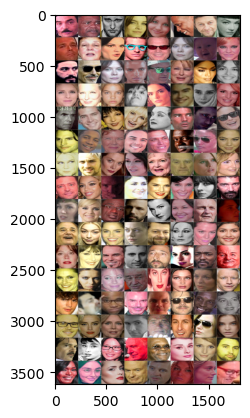

In [6]:
import torchvision.models as models
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ft = models.resnet18(pretrained=True)

transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
        #transforms.RandomAffine(degrees=40, translate=None, scale=(1, 2), shear=15),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
print(model_ft)
#num_ftrs = model_ft.classifier[6].in_features
#print(num_ftrs)
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).

model_ft.fc = nn.Linear(512, 100)
print(model_ft)

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
    
train_dataset = torchvision.datasets.ImageFolder('/kaggle/input/train-main/facenet_cleaned_images_train', transform=transform)

from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
#test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

import os

class_names = os.listdir('/kaggle/input/train-main/facenet_cleaned_images_train')

# Get a batch of training data
inputs, classes = next(iter(train_dataloader))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
#imshow(out,title=[class_names[x] for x in classes])
imshow(out)

In [8]:
model_ft.load_state_dict(torch.load('/kaggle/input/model-resnet-main/model_resnet_main.pt'))

<All keys matched successfully>

In [9]:
for param in model_ft.parameters():
    param.requires_grad = False

In [10]:
for param in model_ft.fc.parameters():
    param.requires_grad = True

In [11]:
for param in model_ft.layer4.parameters():
    param.requires_grad = True

In [12]:
sum(p.numel() for p in model_ft.parameters() if p.requires_grad)

8445028

In [13]:
params = filter(lambda p: p.requires_grad, model_ft.parameters())

In [ ]:
optimizer_ft = optim.SGD(params, lr=0.01, momentum=0.9)
model_ft = train_model(model_ft, train_dataloader, criterion, optimizer_ft, exp_lr_scheduler, device, num_epochs=5)

Epoch 0/4
----------
train Loss: 0.0830 Acc: 0.9825
val Loss: 0.0608 Acc: 0.9875
Epoch 1/4
----------
train Loss: 0.0814 Acc: 0.9831
val Loss: 0.0576 Acc: 0.9885
Epoch 2/4
----------
train Loss: 0.0678 Acc: 0.9863
val Loss: 0.0502 Acc: 0.9900
Epoch 3/4
----------
train Loss: 0.0623 Acc: 0.9874
val Loss: 0.0457 Acc: 0.9908
Epoch 4/4
----------
train Loss: 0.0613 Acc: 0.9875


In [ ]:
torch.save(model_ft.state_dict(), 'model_resnet_main1.pt')

In [ ]:
optimizer_ft = optim.SGD(params, lr=0.001, momentum=0.9)
model_ft = train_model(model_ft, train_dataloader, criterion, optimizer_ft, exp_lr_scheduler, device, num_epochs=5)
torch.save(model_ft.state_dict(), 'model_resnet_main1.pt')

In [183]:
model_ft = train_model(model_ft, train_dataloader, criterion, optimizer_ft, exp_lr_scheduler, device, num_epochs=5)
torch.save(model_ft.state_dict(), 'model_resnet_main1.pt')

Epoch 0/4
----------
train Loss: 0.1672 Acc: 0.9623
val Loss: 0.1217 Acc: 0.9740
Epoch 1/4
----------
train Loss: 0.1407 Acc: 0.9694
val Loss: 0.0966 Acc: 0.9797
Epoch 2/4
----------
train Loss: 0.1228 Acc: 0.9731
val Loss: 0.0846 Acc: 0.9827
Epoch 3/4
----------
train Loss: 0.1017 Acc: 0.9788
val Loss: 0.0792 Acc: 0.9838
Epoch 4/4
----------
train Loss: 0.0977 Acc: 0.9797
val Loss: 0.0646 Acc: 0.9866
Training complete in 118m 4s


In [184]:
model_ft = train_model(model_ft, train_dataloader, criterion, optimizer_ft, exp_lr_scheduler, device, num_epochs=5)
torch.save(model_ft.state_dict(), 'model_resnet_main1.pt')

Epoch 0/4
----------


KeyboardInterrupt: 

In [ ]:
model_ft = train_model(model_ft, train_dataloader, criterion, optimizer_ft, exp_lr_scheduler, device, num_epochs=5)
torch.save(model_ft.state_dict(), 'model_resnet_main1.pt')

In [ ]:
model_ft = train_model(model_ft, train_dataloader, criterion, optimizer_ft, exp_lr_scheduler, device, num_epochs=5)
torch.save(model_ft.state_dict(), 'model_resnet_main1.pt')

In [ ]:
model_ft = train_model(model_ft, train_dataloader, criterion, optimizer_ft, exp_lr_scheduler, device, num_epochs=5)
torch.save(model_ft.state_dict(), 'model_resnet_main1.pt')

In [14]:
def test_model(model, criterion, testloader, device):
    all_labels = []
    all_preds = []
    
    model.eval()   # Set model to evaluate mode
    running_loss = 0.0
    running_corrects = 0
    # Iterate over data.
    size = 0
    for inputs, labels in testloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        # forward
        # track history if only in train
        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            # backward + optimize only if in training phase
        # statistics
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        size+= inputs.size(0)
        all_labels+= labels.data.cpu()
        all_preds+= preds.cpu()
    epoch_loss = running_loss / size
    epoch_acc = running_corrects.double() / size
    print('Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))
    return all_labels, all_preds

In [17]:
model_ft.load_state_dict(torch.load('/kaggle/input/model-resnet-main/model_resnet_main.pt'))
test_dataset = torchvision.datasets.ImageFolder('/kaggle/input/facenet-clean-purdue/facenet_cleaned_images', transform=transform)

from torch.utils.data import DataLoader

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)
#test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
labels, preds = test_model(model_ft, criterion, test_dataloader, device)

Loss: 0.0645 Acc: 0.9886


In [18]:
len(labels)

4995

In [19]:
len(preds)

4995

In [20]:
import os
class_names = os.listdir('/kaggle/input/facenet-clean-purdue/facenet_cleaned_images')

In [21]:
len(class_names)

100

In [22]:
label_class = [class_names[x.item()] for x in labels]
pred_class = [class_names[x.item()] for x in preds]

In [ ]:
print(label_class[:10])
print(pred_class[:10])

In [23]:
from PIL import Image
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms):
        self.img_files = os.listdir(root)
        self.img_list = [os.path.join(root, path) for path in self.img_files ]
        self.transforms = transforms
        
    def __getitem__(self, index):
        img_path = self.img_list[index]
        img_id = self.img_files[index][:-4]
        image = Image.open(img_path).convert('RGB')
        img = self.transforms(image)
        return img, img_id
    
    def __len__(self):
        return len(self.img_list)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
    #transforms.RandomAffine(degrees=40, translate=None, scale=(1, 2), shear=15),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
dataset = MyDataset('/kaggle/input/facenet-cleaned-images-test/facenet_cleaned_images_test', transforms = transform)
testloader = DataLoader(
    dataset,
    batch_size=64,
    num_workers=2,
    shuffle=False
)

In [24]:
def testing_model(model, testloader, device):   
    all_preds = []
    all_ids = []
    model.eval()
    for inputs, ids in testloader:
        inputs = inputs.to(device)
        # forward
        # track history if only in train
        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

        all_preds+=preds.cpu()
        all_ids+=ids
    return all_preds, all_ids

In [25]:
preds, ids = testing_model(model_ft, testloader, device)

In [26]:
len(preds)

4977

In [27]:
len(ids)

4977

In [28]:
class_names.sort()

In [ ]:
class_names

In [29]:
import pandas as pd
sample = pd.read_csv('/kaggle/input/purdue-face-recognition-challenge-2023/sample_submission.csv')
sample['Id']=ids
all_preds = [class_names[x.item()] for x in preds]
sample['Category']=all_preds
sample.to_csv('submit3.csv', index=False)

In [ ]:
sample.head()